In [1]:
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! mkdir dataset
!kaggle datasets download -d danielgrijalvas/movies
!unzip movies.zip -d ./dataset

  0% 0.00/424k [00:00<?, ?B/s]
100% 424k/424k [00:00<00:00, 121MB/s]


In [5]:
import matplotlib
from io import IncrementalNewlineDecoder
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


In [4]:
df = pd.read_csv(r'/content/dataset/movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [18]:
# Missing Data checking

for col in df.columns:
  missing_val = df[col].isnull().sum()
  missing_percent = np.mean(df[col].isnull())
  print('{} - {} percentage: {}'.format(col, missing_val, missing_percent))

name - 0 percentage: 0.0
rating - 77 percentage: 0.010041731872717789
genre - 0 percentage: 0.0
year - 0 percentage: 0.0
released - 2 percentage: 0.0002608242044861763
score - 3 percentage: 0.0003912363067292645
votes - 3 percentage: 0.0003912363067292645
director - 0 percentage: 0.0
writer - 3 percentage: 0.0003912363067292645
star - 1 percentage: 0.00013041210224308815
country - 3 percentage: 0.0003912363067292645
budget - 2171 percentage: 0.2831246739697444
gross - 189 percentage: 0.02464788732394366
company - 17 percentage: 0.002217005738132499
runtime - 4 percentage: 0.0005216484089723526


In [13]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [31]:
df.sort_values(by=['gross'], inplace=True, ascending=False)

In [25]:
pd.set_option('display.max_rows', None)

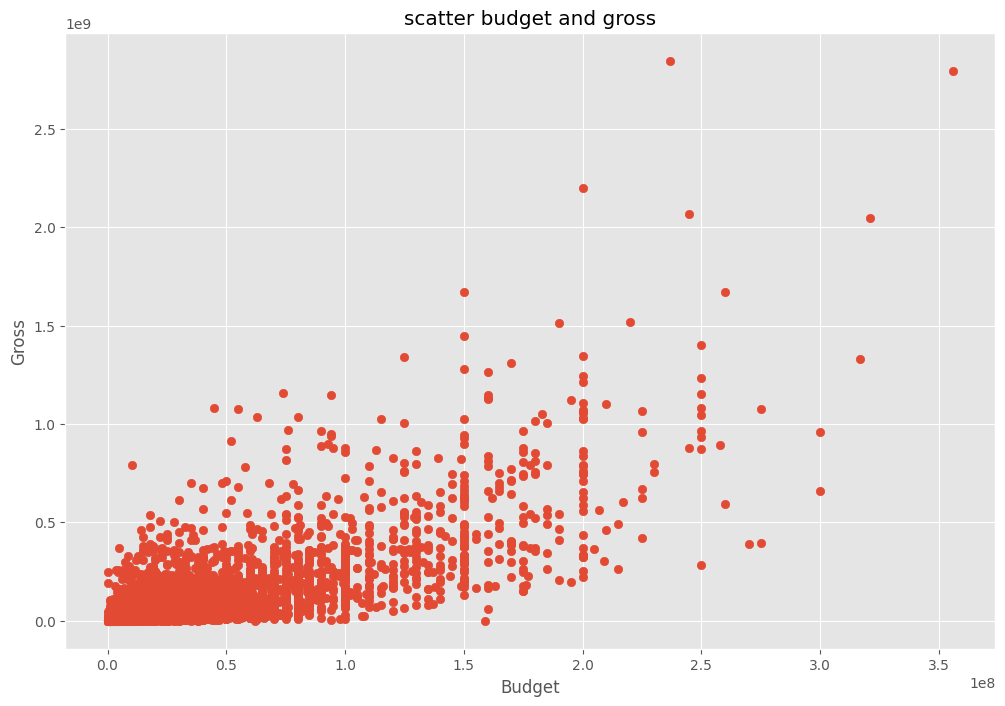

In [34]:
#Budget high correalation & company high correlation
#scatter budget and gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('scatter budget and gross')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.show()


<Axes: xlabel='budget', ylabel='gross'>

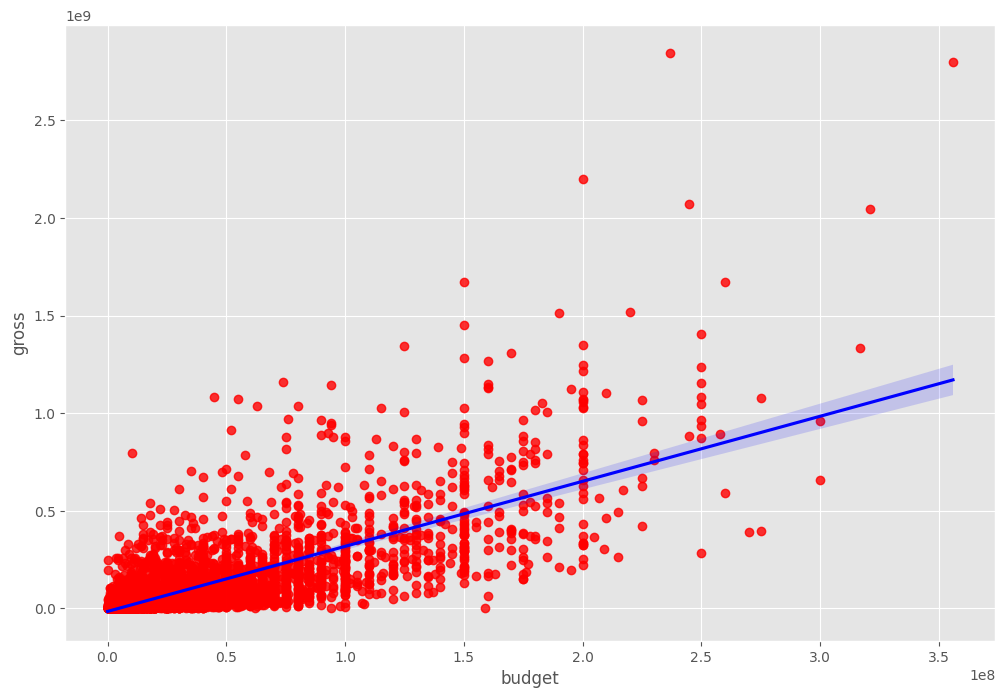

In [37]:
#plot budget vs gross using sns

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':"red"}, line_kws={'color':'blue'})

In [42]:
#corr each numeric columns
df.corr(method='pearson')

<ipython-input-42-bfe80db094f7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


In [ ]:
# High Cor between budget and gross


<ipython-input-43-71733f1ba77e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='pearson')


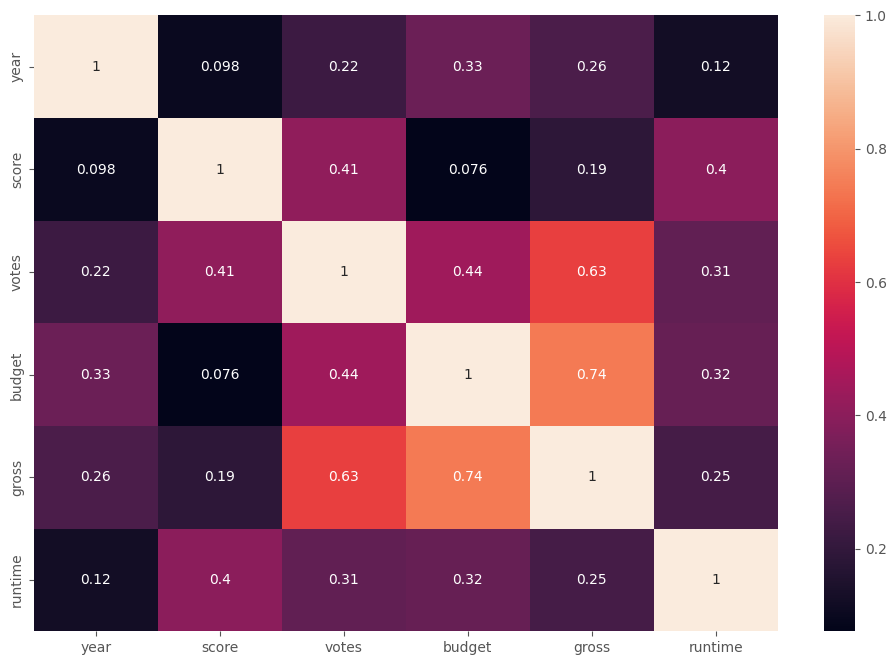

In [43]:
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [46]:
df_numerized = df.copy()

for col_name in df_numerized.columns:
  if df_numerized[col_name].dtype == 'object':
    df_numerized[col_name] = df_numerized[col_name].astype('category')
    df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000.0,2.847246e+09,2253,162.0,259
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000.0,2.797501e+09,1606,181.0,92
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000.0,2.201647e+09,2253,194.0,260
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000.0,2.069522e+09,1540,138.0,259
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000.0,2.048360e+09,1606,149.0,96


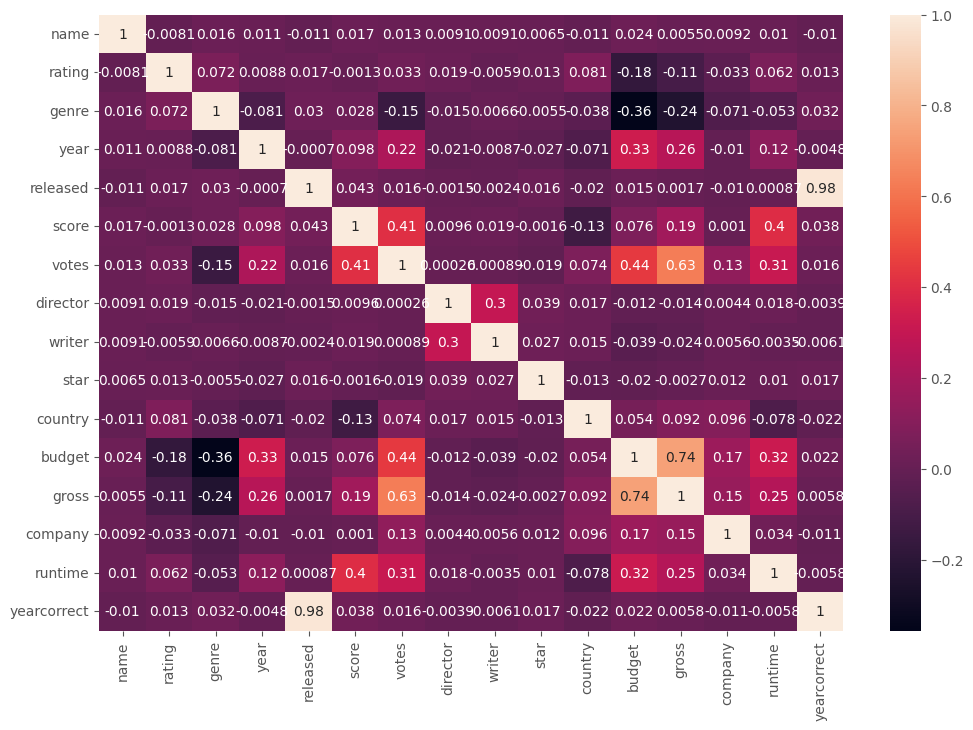

In [48]:
correlation_matrix_df_numerized = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix_df_numerized, annot=True)
plt.show()

In [53]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
sorted_pairs = corr_pairs.sort_values()

In [55]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

gross        votes          0.630757
votes        gross          0.630757
budget       gross          0.740395
gross        budget         0.740395
yearcorrect  released       0.980228
released     yearcorrect    0.980228
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
# Votes and budget have the highest correlation to gross earnings
# Company has low corr
